# Data Collection

In [1]:
# pip install pandas-datareader
import pandas_datareader as pdr

In [2]:
# Get your API key at "https://api.tiingo.com/documentation/general/overview"
df = pdr.get_data_tiingo('AAPL', api_key='key')

In [3]:
df.to_csv('AAPL.csv')

In [4]:
df.head()

adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2015-12-30 00:00:00+00:00  24.854087  25.173679  24.821664  25.145888   
       2015-12-31 00:00:00+00:00  24.377014  24.786926  24.275115  24.782294   
       2016-01-04 00:00:00+00:00  24.397857  24.402026  23.622035  23.763304   
       2016-01-05 00:00:00+00:00  23.786463  24.513651  23.716987  24.490493   
       2016-01-06 00:00:00+00:00  23.320970  23.707723  23.128752  23.288548   

                                  adjVolume   close  divCash     high     low  \
symbol date                                                                     
AAPL   2015-12-30 00:00:00+00:00  100855108  107.32      0.0  108.700  107.18   
       2015-12-31 00:00:00+00:00  163649264  105.26      0.0  107.030  104.82   
       2016-01-04 00:00:00+00:00  270597548  105.35      0.0  105.368  102.00   
       2016-01-05 00:00:00+00:00  223163968  102.71      0.0  105.850  102.41   
       2016-01-06 00:00:00+00:00  273829552  100.70      0.0  102.370   99.87   

                                    open  splitFactor    volume  
symbol date                                                      
AAPL   2015-12-30 00:00:00+00:00  108.58          1.0  25213777  
       2015-12-31 00:00:00+00:00  107.01          1.0  40912316  
       2016-01-04 00:00:00+00:00  102.61          1.0  67649387  
       2016-01-05 00:00:00+00:00  105.75          1.0  55790992  
       2016-01-06 00:00:00+00:00  100.56          1.0  68457388

In [5]:
df1=df.reset_index()['close']

In [6]:
df1

0       107.320
1       105.260
2       105.350
3       102.710
4       100.700
5        96.450
6        96.960
7        98.530
8        99.960
9        97.390
10       99.520
11       97.130
12       96.660
13       96.790
14       96.300
15      101.420
16       99.440
17       99.990
18       93.420
19       94.090
20       97.340
21       96.430
22       94.480
23       96.350
24       96.600
25       94.020
26       95.010
27       94.990
28       94.270
29       93.700
         ...   
1227    119.210
1228    119.260
1229    120.300
1230    119.390
1231    118.030
1232    118.640
1233    117.340
1234    113.850
1235    115.170
1236    116.030
1237    116.590
1238    119.050
1239    122.720
1240    123.080
1241    122.940
1242    122.250
1243    123.750
1244    124.380
1245    121.780
1246    123.240
1247    122.410
1248    121.780
1249    127.880
1250    127.810
1251    128.700
1252    126.655
1253    128.230
1254    131.880
1255    130.960
1256    131.970
Name: close, Length: 125

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.04084185],
       [0.03588695],
       [0.03610343],
       ...,
       [0.09991581],
       [0.09770295],
       [0.10013229]])

# Data Preprocessing

Split data into tain and test test

In [11]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1),:1]

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [14]:
X_train.shape, y_train.shape

((716, 100), (716,))

In [15]:
X_test.shape, y_test.shape

((339, 100), (339,))

In [16]:
# reshape inputs to be [sanples, time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [17]:
X_train.shape

(716, 100, 1)

# Stack LSTM Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0085 - val_loss: 0.0513
Epoch 2/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0021 - val_loss: 0.0205
Epoch 3/100
12/12 [==============================] - 2s 139ms/step - loss: 8.1539e-04 - val_loss: 0.0204
Epoch 4/100
12/12 [==============================] - 2s 140ms/step - loss: 3.9867e-04 - val_loss: 0.0206
Epoch 5/100
12/12 [==============================] - 2s 145ms/step - loss: 3.3037e-04 - val_loss: 0.0192
Epoch 6/100
12/12 [==============================] - 2s 140ms/step - loss: 3.7130e-04 - val_loss: 0.0186
Epoch 7/100
12/12 [==============================] - 2s 135ms/step - loss: 3.0386e-04 - val_loss: 0.0184
Epoch 8/100
12/12 [==============================] - 2s 143ms/step - loss: 3.0973e-04 - val_loss: 0.0177
Epoch 9/100
12/12 [==============================] - 2s 139ms/step - loss: 2.9858e-04 - val_loss: 0.0173
Epoch 10/100
12/12 [==============================] - 2s 143ms/

12/12 [==============================] - 2s 140ms/step - loss: 1.1637e-04 - val_loss: 0.0144
Epoch 79/100
12/12 [==============================] - 2s 154ms/step - loss: 1.1445e-04 - val_loss: 0.0113
Epoch 80/100
12/12 [==============================] - 2s 152ms/step - loss: 1.0827e-04 - val_loss: 0.0143
Epoch 81/100
12/12 [==============================] - 2s 138ms/step - loss: 1.2165e-04 - val_loss: 0.0103
Epoch 82/100
12/12 [==============================] - 2s 138ms/step - loss: 1.0695e-04 - val_loss: 0.0102
Epoch 83/100
12/12 [==============================] - 2s 155ms/step - loss: 1.0752e-04 - val_loss: 0.0127
Epoch 84/100
12/12 [==============================] - 2s 162ms/step - loss: 1.1458e-04 - val_loss: 0.0151
Epoch 85/100
12/12 [==============================] - 2s 146ms/step - loss: 1.0738e-04 - val_loss: 0.0146
Epoch 86/100
12/12 [==============================] - 2s 148ms/step - loss: 1.0870e-04 - val_loss: 0.0154
Epoch 87/100
12/12 [==============================] - 2s 14

In [22]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
# Calculate RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

158.96531476870618

In [26]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

239.33115456665843

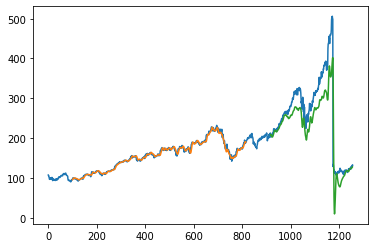

In [27]:
# green Line => Predicted Data
# Orange Line => Training Data
# Blue Line => Original Data

look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

440

In [35]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049,
 0.04748045700541187,
 0.05164161154539987,
 0.04036079374624174,
 0.04300661455201443,
 0.05277209861695731,
 0.05921828021647624,
 0.05712567648827421,
 0.06126277811184605,
 0.06361996392062536,
 0.05455201443174984,
 0.062922429344558,
 0.05488875526157544,
 0.059506915213469624,
 0.059242333132892344,
 0.06405291641611544,
 0

In [39]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09466367]
101
1 day input [0.87858088 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632
 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044
 0.99360192 0.98366807 1.         0.98544799 0.9834997  0.09308479
 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477
 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113  0.04810583
 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721
 0.05921828 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243
 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677
 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239
 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419
 0.044546   0.04432952 0.04834636 0.05919423 0.06900782 0.06819002
 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254
 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339
 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251
 0.07675286 0.08036079 0.08187613 

8 day output [[0.09726053]]
9 day input [0.89455201 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807
 1.         0.98544799 0.9834997  0.09308479 0.10544799 0.09876127
 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871
 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107
 0.05943476 0.06316296 0.05017438 0.06008419 0.044546   0.04432952
 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762
 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253
 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891
 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079
 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465
 0.09012628 0.09226699 

16 day output [[0.09933881]]
17 day input [0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077
 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287
 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334
 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237
 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628 0.09226699
 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229 0.09466367
 0.09634129 0.097249

24 day output [[0.10309909]]
25 day input [0.0556825  0.05209862 0.06016837 0.06061335 0.0524113  0.04810583
 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721
 0.05921828 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243
 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677
 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239
 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419
 0.044546   0.04432952 0.04834636 0.05919423 0.06900782 0.06819002
 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254
 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339
 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251
 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377
 0.07562237 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365
 0.09991581 0.09770295 0.10013229 0.09466367 0.09634129 0.09724987
 0.0976039  0.09763904 0.09753396 0.09740077 0.0973001  0.09726053
 0.09729324 0.09740046 

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
len(df1)

1257

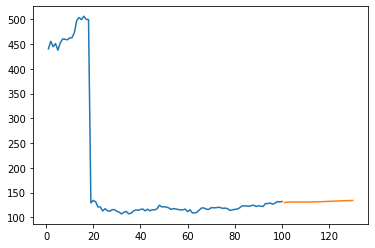

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

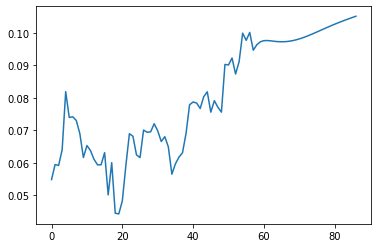

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()

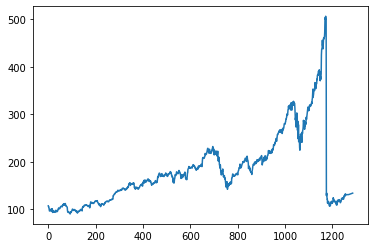

In [45]:
plt.plot(df3)